<h2 style='text-align:center;'>🌸 PetalPredict - Iris Flower Classification</h2>

## 📌 Introduction
This notebook demonstrates an end-to-end Machine Learning workflow on the **Iris dataset**.

We will:
1. Load & explore the dataset
2. Perform Exploratory Data Analysis (EDA)
3. Train classification models
4. Evaluate performance (Accuracy, Confusion Matrix)
5. Save the best model as a **Pipeline** (`best_model.pkl`) for deployment in Flask

In [5]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import joblib

In [2]:
# 📂 Load dataset
df = pd.read_csv('../data/iris.csv')
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## 🔍 Dataset Overview

In [3]:
# Check info & summary
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,count,mean,std,min,25%,50%,75%,max
Sepal_Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal_Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal_Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal_Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## 📊 Exploratory Data Analysis (EDA)

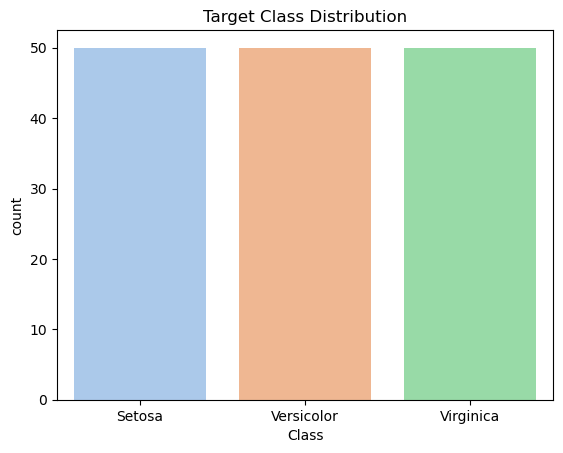

In [6]:
# Class distribution
sns.countplot(x='Class', data=df, palette='pastel')
plt.title('Target Class Distribution')
plt.show()

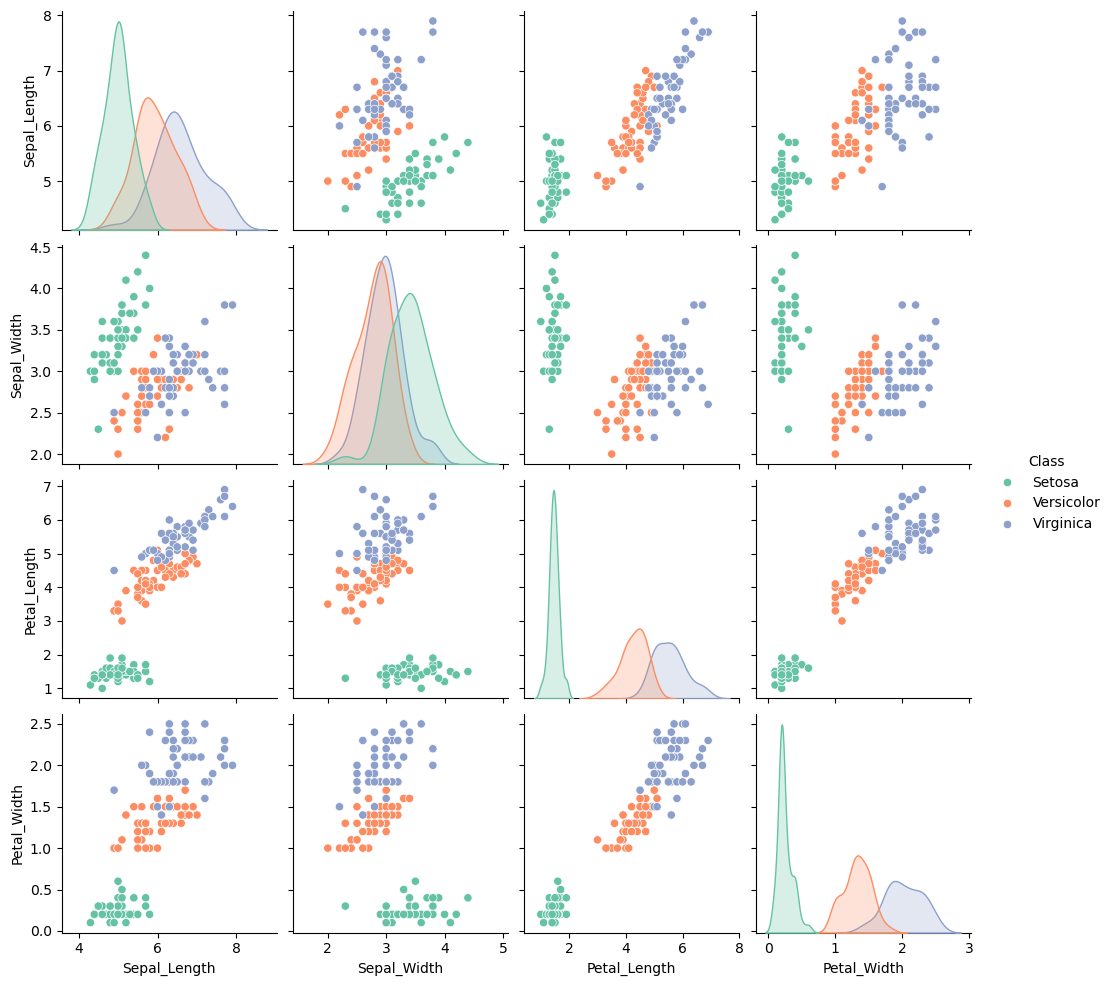

In [7]:
# Pairplot to visualize features
sns.pairplot(df, hue='Class', palette='Set2')
plt.show()

## 🤖 Model Training

In [8]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build pipeline with scaling + RandomForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

## 📈 Model Evaluation

Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.82      0.90      0.86        10
   Virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



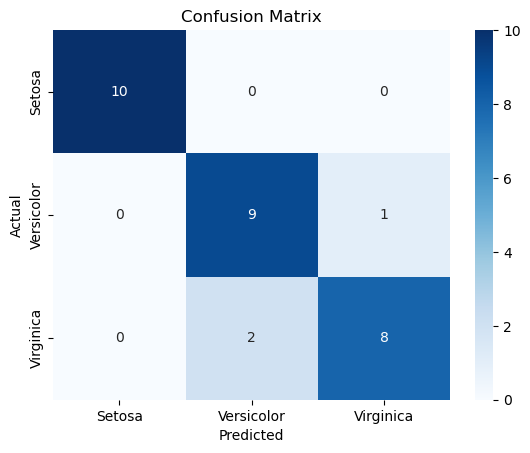

In [9]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 💾 Save Model

In [10]:
# Save trained pipeline (includes scaler + model)
joblib.dump(pipeline, '../app/models/best_model.pkl')
print('✅ Model saved to ../app/models/best_model.pkl')

✅ Model saved to ../app/models/best_model.pkl


## ✅ Conclusion
- Trained RandomForest on Iris dataset
- Achieved high accuracy (typically >95%)
- Saved pipeline (scaler + model) as `best_model.pkl`
- Ready for Flask deployment 🚀